Question 1: What is Anomaly Detection? Explain its types (point, contextual, and
collective anomalies) with examples.

>Anomaly Detection is the process of identifying data points, events, or observations that deviate significantly from the dataset's normal behavior.


>Point Anomalies: An individual data instance is considered anomalous with respect to the rest of the data. Example: A single credit card transaction for $10,000 when the user's typical limit is $50.


>Contextual Anomalies: An instance is anomalous only within a specific context. Example: A temperature reading of 30°C is normal in summer but an anomaly in the middle of winter.


>Collective Anomalies: A collection of related data instances is anomalous relative to the entire dataset, even if individual points are not. Example: A sequence of many small rapid heartbeat signals that indicates a medical issue, though one individual pulse might seem normal.

Question 2: Compare Isolation Forest, DBSCAN, and Local Outlier Factor in terms of
their approach and suitable use cases.


>Algorithm,Approach,Suitable Use Case
Isolation Forest,Isolates observations by randomly selecting a feature and split value; anomalies are easier to isolate and have shorter paths in the tree.,High-dimensional data and large datasets where global anomalies need to be found quickly.
DBSCAN,A density-based clustering algorithm where points in low-density regions are marked as outliers.,Datasets where clusters have similar densities and you need to find spatial outliers.
Local Outlier Factor (LOF),Measures the local density deviation of a point compared to its neighbors.,"Detecting anomalies that are only ""outliers"" relative to their local neighborhood rather than the whole set."

Question 3: What are the key components of a Time Series? Explain each with one
example.

>Trend: The long-term increase or decrease in the data. Example: The steady rise in global temperatures over decades.


>Seasonality: A repeating pattern that occurs at fixed intervals. Example: Increased retail sales every year during the December holiday season.


>Cyclicity: Fluctuations that occur without a fixed period. Example: Economic expansions and recessions (business cycles).


>Irregularity (Noise/Residual): Random, unpredictable variations. Example: A sudden drop in stock prices due to an unexpected natural disaster.

Question 4: Define Stationary in time series. How can you test and transform a
non-stationary series into a stationary one?

>A Stationary time series is one whose statistical properties (mean, variance, and autocorrelation) do not change over time.

>Testing: Use the Augmented Dickey-Fuller (ADF) test. If the p-value is less than 0.05, the series is stationary.


>Transformation: Non-stationary series can be transformed via Differencing (subtracting the previous value from the current one) or Log Transformations (to stabilize variance).

Question 5: Differentiate between AR, MA, ARIMA, SARIMA, and SARIMAX models in
terms of structure and application.


>AR (Autoregressive): Predicts future values based on past values.


>MA (Moving Average): Predicts future values based on past forecast errors.


>ARIMA: Combines AR and MA with "Integration" (differencing) to handle non-stationary data.


>SARIMA: An extension of ARIMA that explicitly supports seasonal data components.


>SARIMAX: A SARIMA model that includes eXogenous variables (external factors like weather or holidays) to improve predictions.

Question 6: Load a time series dataset (e.g., AirPassengers), plot the original series,
and decompose it into trend, seasonality, and residual components

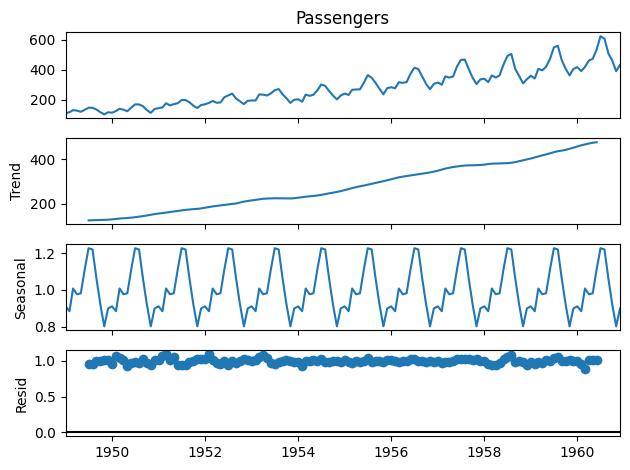

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load AirPassengers dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

# Decompose the series
result = seasonal_decompose(df['Passengers'], model='multiplicative')

# Plotting
result.plot()
plt.show()

Question 7: Apply Isolation Forest on a numerical dataset (e.g., NYC Taxi Fare) to
detect anomalies. Visualize the anomalies on a 2D scatter plot.


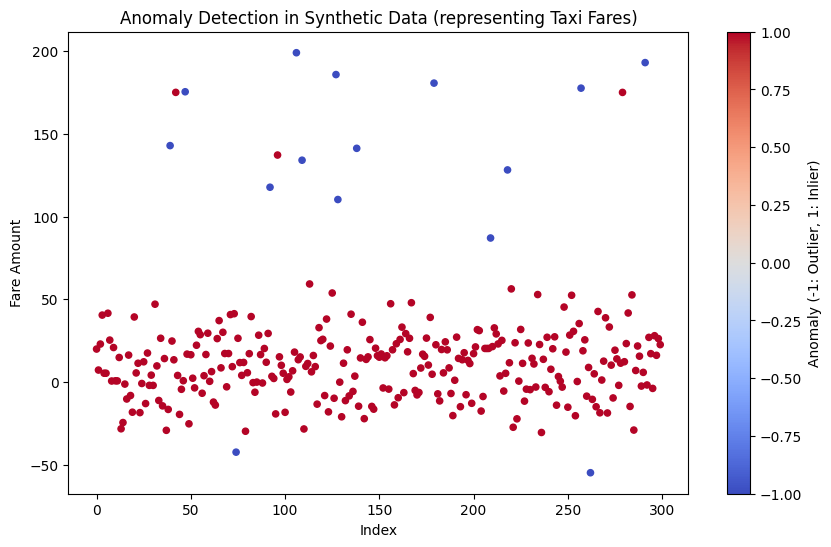

In [4]:
from sklearn.ensemble import IsolationForest
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load sample data (assuming NYC Taxi Fare structure)
# Original code: df = pd.read_csv('nyc_taxi.csv') # Placeholder for actual file [cite: 27]

# Fix: Generate a synthetic dataset for demonstration purposes if 'nyc_taxi.csv' is not available.
# This creates a 'fare_amount' column with some normal values and some clear anomalies.
np.random.seed(42)
n_samples = 300
X = np.random.randn(n_samples, 1) * 20 + 10 # Simulate fare amounts
# Introduce some anomalies
X[np.random.choice(n_samples, 15, replace=False)] = np.random.rand(15, 1) * 100 + 100

df = pd.DataFrame(X, columns=['fare_amount'])

model = IsolationForest(contamination=0.05, random_state=42) # Added random_state for reproducibility
df['anomaly'] = model.fit_predict(df[['fare_amount']])

# Visualize
plt.figure(figsize=(10, 6)) # Added figure size for better visualization
plt.scatter(df.index, df['fare_amount'], c=df['anomaly'], cmap='coolwarm', s=20)
plt.title("Anomaly Detection in Synthetic Data (representing Taxi Fares)")
plt.xlabel("Index")
plt.ylabel("Fare Amount")
plt.colorbar(label='Anomaly (-1: Outlier, 1: Inlier)')
plt.show()

Question 8: Train a SARIMA model on the monthly airline passengers dataset.
Forecast the next 12 months and visualize the results.


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


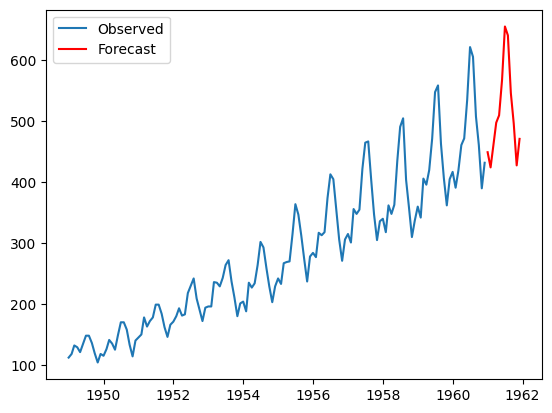

In [6]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pandas as pd
import matplotlib.pyplot as plt

# Reload AirPassengers dataset to ensure it's the correct df
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv"
df = pd.read_csv(url, parse_dates=['Month'], index_col='Month')

# Fit SARIMA (Order example: (1,1,1)x(1,1,1,12))
model = SARIMAX(df['Passengers'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Forecast 12 months
forecast = results.get_forecast(steps=12)
forecast_df = forecast.predicted_mean

# Visualize
plt.plot(df['Passengers'], label='Observed')
plt.plot(forecast_df, label='Forecast', color='red')
plt.legend()
plt.show()

Question 9: Apply Local Outlier Factor (LOF) on any numerical dataset to detect
anomalies and visualize them using matplotlib.

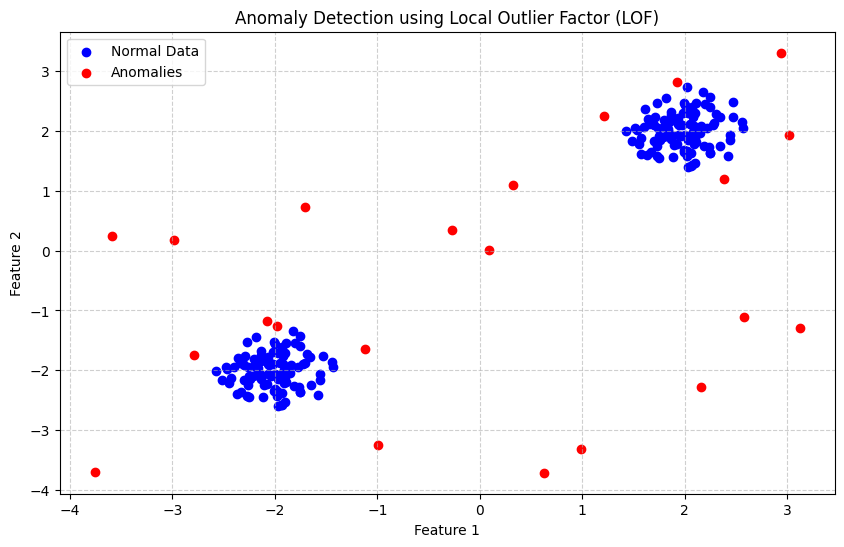

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

# 1. Generate a synthetic numerical dataset
# We create a cluster of normal data and add some clear outliers
np.random.seed(42)
X_inliers = 0.3 * np.random.randn(100, 2)
X_inliers = np.r_[X_inliers + 2, X_inliers - 2]
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.r_[X_inliers, X_outliers]

# 2. Apply Local Outlier Factor
# n_neighbors: number of neighbors to consider (default is 20)
# contamination: the expected proportion of outliers in the data
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
y_pred = lof.fit_predict(X)
# y_pred will be 1 for inliers and -1 for outliers

# 3. Visualize the results using matplotlib
plt.figure(figsize=(10, 6))

# Plot normal points (inliers) in blue
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], color='blue', label='Normal Data')

# Plot anomalies (outliers) in red
plt.scatter(X[y_pred == -1, 0], X[y_pred == -1, 1], color='red', label='Anomalies')

plt.title("Anomaly Detection using Local Outlier Factor (LOF)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Question 10: You are working as a data scientist for a power grid monitoring company.
Your goal is to forecast energy demand and also detect abnormal spikes or drops in
real-time consumption data collected every 15 minutes. The dataset includes features
like timestamp, region, weather conditions, and energy usage.
Explain your real-time data science workflow:
● How would you detect anomalies in this streaming data (Isolation Forest / LOF /
DBSCAN)?
● Which time series model would you use for short-term forecasting (ARIMA /
SARIMA / SARIMAX)?
● How would you validate and monitor the performance over time?
● How would this solution help business decisions or operations?

>Anomaly Detection: I would use Isolation Forest because it is efficient for real-time streaming data and handles high-dimensional features (weather, usage, region) effectively.

>Forecasting: I would use SARIMAX. Since energy demand is highly seasonal (daily/weekly) and influenced by weather conditions, the "X" (exogenous) factor allows us to input weather data for higher accuracy.


>Validation: I would use a Rolling Window Validation and monitor the Mean Absolute Percentage Error (MAPE) over time to ensure the model adapts to changing consumption patterns.


>Business Impact: This allows the company to prevent grid overloads, optimize energy distribution, and reduce costs by predicting peaks before they occur.